### Developer: Savin Shynu Varghese

## Audio Deepfake detection
### Outline
1. Exploratory data analysis and visualization
2. Preprocessing
3. Model development
4. Model Evaluation

###  Exploratory data analysis and visualization

The dataset for this work is stored in the dagshub repository: "Omdena/BangladeshChapter_Audiosheild".
We can mount the data directly from the dagshub into google collab, but working in this manner is slow. For the purpose of this notebook, I have collected the data from the dagshub repo and stored locally on my laptop for easier processing. 

Data from the dagshub can be mounted in google collab this way:

1. install dagshub: **%pip install -q dagshub**

2. Mounting the repository :
      
    **import dagshub.colab**
   
    **repo=dagshub.colab.login()**

2. Mount path: **path=dagshub.storage.mount('Omdena/BangladeshChapter_AudioShield')**


### Data Exploration.
Let's explore the dataset to understand the content in terms of the raw data and their annotations.

In [2]:
# data directory
data_dir = '/Users/savin/Omdena-Projects/Audioshield/data_train/'

%ls /Users/savin/Omdena-Projects/Audioshield/data_train/

ASVspoof2019_LA_asv_protocols/ ASVspoof2019_LA_eval/
ASVspoof2019_LA_asv_scores/    ASVspoof2019_LA_train/
ASVspoof2019_LA_cm_protocols/  README.LA.txt
ASVspoof2019_LA_dev/


As we can see here, there are 3 folders containing the training, development(validation) and evaluation (test) datasets. The ASVspoof2019_LA_cm_protocols folder contains the metadata labelings of the each dataset.

In [3]:
%ls /Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_cm_protocols

ASVspoof2019.LA.cm.dev.trl.txt    ASVspoof2019.LA.cm.train.trn.txt
ASVspoof2019.LA.cm.eval.trl.txt


In [4]:
#Listing the contents of the training file in the protocol folder
%cat /Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt

LA_0079 LA_T_1138215 - - bonafide
LA_0079 LA_T_1271820 - - bonafide
LA_0079 LA_T_1272637 - - bonafide
LA_0079 LA_T_1276960 - - bonafide
LA_0079 LA_T_1341447 - - bonafide
LA_0079 LA_T_1363611 - - bonafide
LA_0079 LA_T_1596451 - - bonafide
LA_0079 LA_T_1608170 - - bonafide
LA_0079 LA_T_1684951 - - bonafide
LA_0079 LA_T_1699801 - - bonafide
LA_0079 LA_T_1703395 - - bonafide
LA_0079 LA_T_1736342 - - bonafide
LA_0079 LA_T_1779188 - - bonafide
LA_0079 LA_T_1786825 - - bonafide
LA_0079 LA_T_1787246 - - bonafide
LA_0079 LA_T_1905558 - - bonafide
LA_0079 LA_T_2205687 - - bonafide
LA_0079 LA_T_2220901 - - bonafide
LA_0079 LA_T_2361751 - - bonafide
LA_0079 LA_T_2373806 - - bonafide
LA_0079 LA_T_2417641 - - bonafide
LA_0079 LA_T_2520083 - - bonafide
LA_0079 LA_T_2562689 - - bonafide
LA_0079 LA_T_2564579 - - bonafide
LA_0079 LA_T_2732709 - - bonafide
LA_0079 LA_T_2759900 - - bonafide
LA_0079 LA_T_2838981 - - bonafide
LA_0079 LA_T_2873890 - - bonafide
LA_0079 LA_T_2938316 - - bonafide
LA_0079 LA_T_3

In [5]:
%cat /Users/savin/Omdena-Projects/Audioshield/data_train/README.LA.txt

ASVspoof 2019: The 3rd Automatic Speaker Verification Spoofing and Countermeasures Challenge database

Logical access (LA)


1. Directory Structure
_______________________

  --> LA  
          --> ASVspoof2019_LA_asv_protocols
          --> ASVspoof2019_LA_asv_scores
	  --> ASVspoof2019_LA_cm_protocols
          --> ASVspoof2019_LA_dev
          --> ASVspoof2019_LA_eval
	  --> ASVspoof2019_LA_train
	  --> README.LA.txt


2. Description of the audio files
_________________________________

   ASVspoof2019_LA_train, ASVspoof2019_LA_dev, and ASVspoof2019_LA_eval contain audio files for training, development, and evaluation
   (LA_T_*.flac, LA_D_*.flac, and LA_E_*.flac, respectively). ASVspoof2019_PA_dev, and ASVspoof2019_PA_eval contain audio files to enroll ASV system. The audio files in the directories are in the flac format. 
   The sampling rate is 16 kHz, and stored in 16-bit.


3. Description of the protocols
_______________________________

CM protocols:

   ASVspoof2019_LA_cm_pro

In [6]:
# Listing a small list of files in the training folder
%ls /Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1*

/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1000137.flac
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1000406.flac
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1000648.flac
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1000824.flac
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1001074.flac
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1001114.flac
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1001169.flac
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1001718.flac
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1001871.flac
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1002656.flac
/Users/savin/Omdena-Projects/A

We can see all the audio files in the .flac format here. FLAC (Free Lossless Audio Codec) is an audio coding format for lossless compression of digital audio. We can start to read some audio files from the train folder and do some visualization.

In [7]:
import glob
import numpy as np
import librosa
import librosa.display
from matplotlib import pyplot as plt
import IPython.display as ipd


# Audio data in the training, dev and eval  folder
train_fold = data_dir+'ASVspoof2019_LA_train/flac/*.flac'
dev_fold = data_dir+'ASVspoof2019_LA_dev/flac/*.flac'
eval_fold = data_dir+'ASVspoof2019_LA_eval/flac/*.flac'

# audio files
train_files = sorted(glob.glob(train_fold))
dev_files = sorted(glob.glob(dev_fold))
eval_files = sorted(glob.glob(eval_fold))

print(f"No. of audio files in the training folder: {len(train_files)}")
print(f"No. of audio files in the dev folder: {len(dev_files)}")
print(f"No. of audio files in the eval folder: {len(eval_files)}")

No. of audio files in the training folder: 25380
No. of audio files in the dev folder: 24986
No. of audio files in the eval folder: 71933


For the moment, let's concentrate on the data from the training folder. For the display of audio files, we will import 2 libraries here. Librosa is widely used to handle the audio data files.

### Time Domain and Frequency domain visualization
1. Time series
2. Spectrogram
3. Mel spectrograms

First we will look at the audio time series which is power plotted as a function of time. From the Fourier analysis, we know that each time series can be decomposed into it's frequency components using Fourier transform. This will allow us to undestand how much of a frequency content is present in each signal. If the signal frequency content is stationary, we can conduct a discrete Fourier transform. If the frequency inforamtion changes as a function of time, then we can divide the time series into short time segments and calculate their corresponing fourier transform to get a spectrogram (2D array of frequency and time). 

Sample length: (55134,) and the sample rate: 22050, duration :2.500s


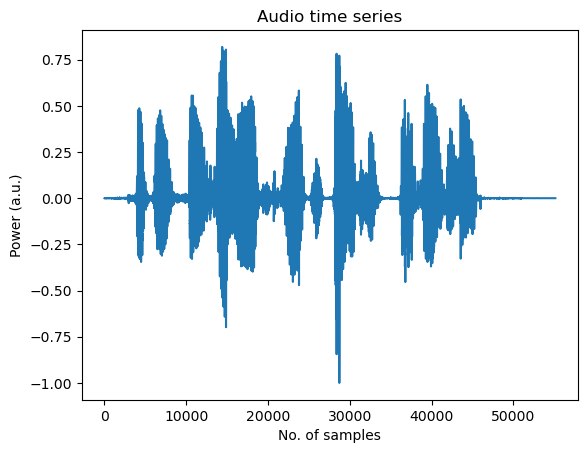

In [8]:
# play the first audio file
ipd.Audio(train_files[0])

# Load a sample audio file as a time series and the sample rate of the audio
y, sr = librosa.load(train_files[0])

print(f"Sample length: {y.shape} and the sample rate: {sr}, duration :{y.shape[0]/sr:0.3f}s")

# Let's plot the audio time series
plt.plot(y)
plt.xlabel("No. of samples")
plt.ylabel("Power (a.u.)")
plt.title("Audio time series")
plt.show()

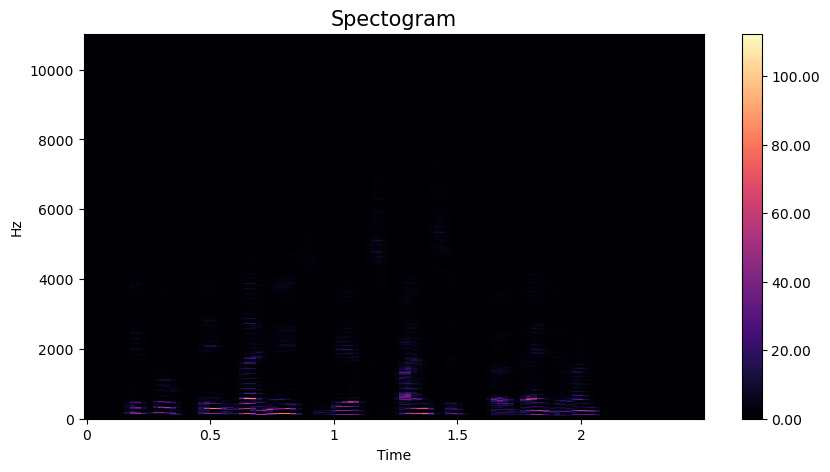

In [9]:
# Now let's plot a spectrogram
# for this we will use an FFT with a window length of 2048 samples, hop_length = fft_size/4 which is the distance 
# between adjacent fft windows. The time segments can be overlapping to measure the change in the frequency component.

S = np.abs(librosa.stft(y, n_fft=2048, hop_length = 512)) # taking the amplitude of the FFT output
#plt.imshow(S, cmap='jet', aspect='auto', origin='lower')
#plt.show()

# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S,
                              x_axis='time',
                              y_axis='hz',
                              ax=ax)
ax.set_title('Spectogram', fontsize=15)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()


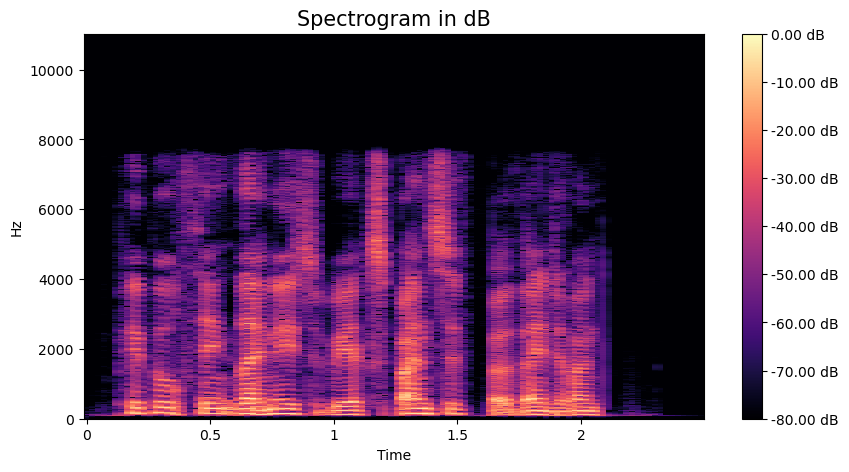

In [10]:
# Let's look at the spectrogram in decibels
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='hz',
                              ax=ax)
ax.set_title('Spectrogram in dB', fontsize=15)
fig.colorbar(img, ax=ax, format=f'%0.2f dB')
plt.show()

### Mel Spectrogram
All the frequnecy and time components can be clearly seen with the decibel units. Now let's see how the mel spectrogram looks like. Mel spectrogram is a spectrogram with its frequencies converted to Mel scale or basically in a log scale. For human beings, it is easy to understand the difference between frequencies at low frequencies than the high frequencies. Mel scale was introduced so that equal distance in pitch/frequency will sound equally distant to the listner.
This can be easily computed using the "librosa.feature.melspectrogram" function. The input can be either a time series or a spectrogram. If given a time series, we need to specify the length of FFT and the overlap between time segments to calculate an STFT first. Let's do it directly from the time series as we will carry out that approach.

Mel spectrogram shape: (128, 87)


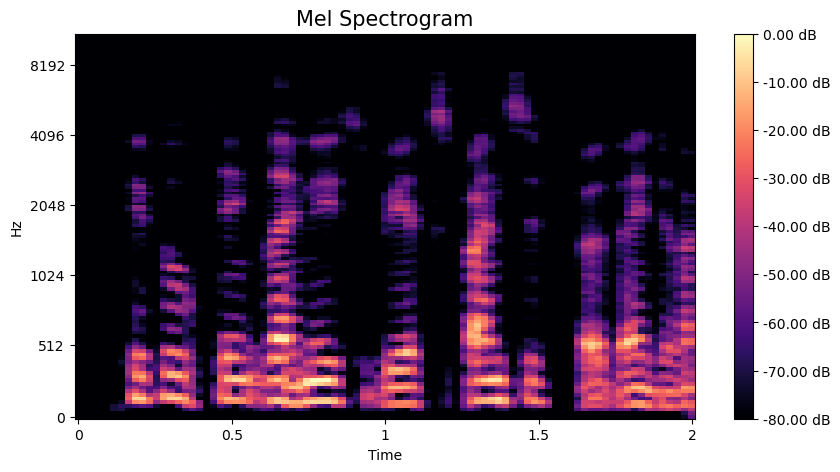

In [11]:
#S_mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2)

# Reading 2 seconds of data
S_mel = librosa.feature.melspectrogram(y=y[:int(sr*2.0)], sr=sr, n_mels=128)
S_db_mel = librosa.amplitude_to_db(S_mel, ref=np.max)

print(f"Mel spectrogram shape: {S_db_mel.shape}")
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='mel',
                              ax=ax)
ax.set_title('Mel Spectrogram', fontsize=15)
fig.colorbar(img, ax=ax, format=f'%0.2f dB')
plt.show()

### Data Preprocessing
For modeling the data, let's take a random set of 5000 bonafide and spoof data for training. For that first we need to collect the label and filename information from the text file. Once we have that we can select a random set of 5000 audio files in both categories for training the model.

In [12]:
import pandas as pd

filepath = '/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/'
# Funciton to extract information from the text file
def get_label_info(text_file):
    """
    Returns a pandas dataframe of label information
    Arguments:
    text_file: input text file with audio filename and labels
    """
    speaker_code = []
    filename = []
    spoof_code = []
    label = []
    with open(text_file,"r") as fh:
        for line in fh.readlines():
            str = line.split()
            speaker_code.append(str[0])
            filename.append(filepath + str[1] + '.flac') # adding the file extension for easy extraction
            spoof_code.append(str[3])
            label.append(str[4])
        fh.close()
    df = pd.DataFrame(data={'filename': filename, 'label': label, 'speaker_code': speaker_code, 'spoof_code': spoof_code})
    return df    

# text file containing information of the training data
label_file = '/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'

df = get_label_info(label_file)
df.head()     

,filename,label,speaker_code,spoof_code
0,/Users/savin/Omdena-Projects/Audioshield/data_...,bonafide,LA_0079,-
1,/Users/savin/Omdena-Projects/Audioshield/data_...,bonafide,LA_0079,-
2,/Users/savin/Omdena-Projects/Audioshield/data_...,bonafide,LA_0079,-
3,/Users/savin/Omdena-Projects/Audioshield/data_...,bonafide,LA_0079,-
4,/Users/savin/Omdena-Projects/Audioshield/data_...,bonafide,LA_0079,-


In [13]:
# Now let's get some basic info out of the dataframe
df.describe()

,filename,label,speaker_code,spoof_code
count,25380,25380,25380,25380
unique,25380,2,20,7
top,/Users/savin/Omdena-Projects/Audioshield/data_...,spoof,LA_0089,A01
freq,1,22800,1308,3800


As we can see there are 25380 unique audio files, 2 classes of labels, files corresponding to 20 speakers and 2 spoof codes. Let's see what the individual categories are.

In [14]:
df["label"].value_counts()

label
spoof       22800
bonafide     2580
Name: count, dtype: int64

In [15]:
df["spoof_code"].value_counts()

spoof_code
A01    3800
A02    3800
A03    3800
A04    3800
A05    3800
A06    3800
-      2580
Name: count, dtype: int64

In [16]:
df["speaker_code"].value_counts()

speaker_code
LA_0089    1308
LA_0082    1308
LA_0083    1308
LA_0096    1308
LA_0095    1308
LA_0094    1308
LA_0093    1308
LA_0092    1308
LA_0090    1243
LA_0097    1243
LA_0091    1243
LA_0079    1243
LA_0080    1243
LA_0088    1243
LA_0087    1243
LA_0086    1243
LA_0085    1243
LA_0084    1243
LA_0081    1243
LA_0098    1243
Name: count, dtype: int64

As we can see, the number of bonafide audio files in the training sample are way smaller compared to the number of spoofed files. The spoofed files have almost equal contributions from different spoofing techniques. 

To avoid bias during modeling of the datasets, let't take the whole bonafide dataset and equal number of spoofed files randomly sampled from the list we have.

In [17]:
# Get a list of data frame with the bonafide files and labels
bon_dat = df[df['label']=='bonafide'][["filename", "label"]]
bon_dat.value_counts()

filename                                                                                          label   
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1000406.flac  bonafide    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_6839158.flac  bonafide    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_6926903.flac  bonafide    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_6927292.flac  bonafide    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_6935436.flac  bonafide    1
                                                                                                             ..
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_3969759.flac  bonafide    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_3971937.flac  bonafide   

In [18]:
# Get a random sample of the spoofed data from the list
spoof_dat = df[df['label']=='spoof'].sample(2580, axis=0)

#Let's take a look at the spoof code distribution
spoof_dat['spoof_code'].value_counts()

spoof_code
A01    461
A06    443
A04    440
A05    417
A03    414
A02    405
Name: count, dtype: int64

So there are roughly equal contribution of audio files from different spoofing systems. This is to make sure that the model is robust to deepfake data from different spoofing methods.

In [19]:
# Just selecting the filenames and corresponding labels.
spoof_dat = spoof_dat[["filename", "label"]]
spoof_dat.value_counts()

filename                                                                                          label
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_1000648.flac  spoof    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_6827069.flac  spoof    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_6910450.flac  spoof    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_6916185.flac  spoof    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_6921964.flac  spoof    1
                                                                                                          ..
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_4080490.flac  spoof    1
/Users/savin/Omdena-Projects/Audioshield/data_train/ASVspoof2019_LA_train/flac/LA_T_4082543.flac  spoof    1
/Users/savin/Omdena-Proj

Let's combine the spoof list and bonafide list to make a single list which can be used to create a training set and cross validation set

In [20]:
# concatenating data frames and shuffling them
fin_df = pd.concat([bon_dat, spoof_dat]).sample(frac=1,random_state = 42)
fin_df.head()

,filename,label
2387,/Users/savin/Omdena-Projects/Audioshield/data_...,bonafide
14075,/Users/savin/Omdena-Projects/Audioshield/data_...,spoof
654,/Users/savin/Omdena-Projects/Audioshield/data_...,bonafide
1084,/Users/savin/Omdena-Projects/Audioshield/data_...,bonafide
2516,/Users/savin/Omdena-Projects/Audioshield/data_...,bonafide


In [21]:
fin_df['filename'].value_counts()
fin_df['label'].value_counts()

label
bonafide    2580
spoof       2580
Name: count, dtype: int64

####  Feature extraction
Now we will extract the Mel spectrogram for all the training and CV audio files. But before that we have to make sure that the array dimensions of all the mel spectrograms are the same for feeding into CNN model. For that we need to investigate the duration of all the train and test files.

In [22]:
# Let's get the duration of all the files

def get_duration(df):
    """
    Function to get the duration of all the video files
    in the pandas data frame
    Returns: durations, numpy array
    argument:
    df : input pandas data frame
    """
    info = np.zeros(df.shape)
    for i in range(df.shape[0]):
        filename = df.iloc[i,0]
        y, sr = librosa.load(filename)
        info[i,:] = [y.shape[0]/sr, sr]
    return info

# Get the duration of all the files in the final data frame
info = get_duration(fin_df)
dur_files = info[:,0] # durations
sr_files = info[:,1]  # sample rates

print(f"Minimum: {dur_files.min():0.3f}, Maximum: {dur_files.max():0.3f}, Average: {dur_files.mean():0.3f}")
print(f"Minimum: {sr_files.min():0.3f}, Maximum: {sr_files.max():0.3f}, Average: {sr_files.mean():0.3f}")

Minimum: 0.707, Maximum: 12.434, Average: 3.395
Minimum: 22050.000, Maximum: 22050.000, Average: 22050.000


The minimum duration is 0.7 seconds and the maximum is 11 seconds

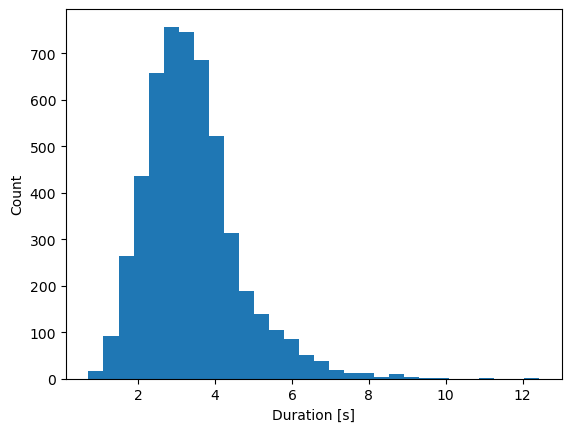

In [23]:
# plot a histogram of the durations
plt.hist(dur_files, 30)
plt.ylabel("Count")
plt.xlabel("Duration [s]")
plt.show()

I think here there are roughly 200 files which has a duration less than 2 seconds. Let's select files which has a duration greater than 2 seconds. Then will take the first 2 seconds of data for training. Let's add this information to the final dataframe as well

In [24]:
# adding the duration and sample rate to the fin_df
fin_df.insert(2, 'duration', dur_files)
fin_df.insert(3, 'sample_rate', sr_files)

In [25]:
# converting labels to numerical values
fin_df['label'] = fin_df['label'].replace({'bonafide' : 1 , 'spoof' : 0})

# look at the header after adding new columns
fin_df.head()

,filename,label,duration,sample_rate
2387,/Users/savin/Omdena-Projects/Audioshield/data_...,1,7.783583,22050.0
14075,/Users/savin/Omdena-Projects/Audioshield/data_...,0,2.940408,22050.0
654,/Users/savin/Omdena-Projects/Audioshield/data_...,1,7.378730,22050.0
1084,/Users/savin/Omdena-Projects/Audioshield/data_...,1,2.679501,22050.0
2516,/Users/savin/Omdena-Projects/Audioshield/data_...,1,2.128073,22050.0


In [26]:
# Let's select files which has a minimum duration of 2 seconds
df_cut = fin_df[fin_df['duration']>=2.0]

df_cut.head()
#df_cut.describe()


,filename,label,duration,sample_rate
2387,/Users/savin/Omdena-Projects/Audioshield/data_...,1,7.783583,22050.0
14075,/Users/savin/Omdena-Projects/Audioshield/data_...,0,2.940408,22050.0
654,/Users/savin/Omdena-Projects/Audioshield/data_...,1,7.378730,22050.0
1084,/Users/savin/Omdena-Projects/Audioshield/data_...,1,2.679501,22050.0
2516,/Users/savin/Omdena-Projects/Audioshield/data_...,1,2.128073,22050.0


We lost around 686 samples in the duration threshold cut process.

####  Splitting of the data
Now this dataframe will be split into train and cross vaildation with a 80:20 ratio. After that we will load 2 seconds of data from each audio file, convert it into a mel spectrogram and store it as an array.

In [27]:
from sklearn.model_selection import train_test_split

# Split into train and test first
df_train, df_cv = train_test_split(df_cut, test_size = 0.2, random_state = 0)

print(f" Train set size: {df_train.shape[0]}, CV set size: {df_cv.shape[0]}")

 Train set size: 3740, CV set size: 935


In [28]:
# Grid size of Mel spectrogram for reading 2 seconds of data
ntime = 87
nfreq = 128

# Initializing the array to save the mel spectrograms
X_train = np.zeros((df_train.shape[0], nfreq, ntime, 1))
Y_train = df_train['label']

X_cv = np.zeros((df_cv.shape[0], nfreq, ntime, 1))
Y_cv = df_cv['label']

# Now let's load the load first 2 seconds of the audio files into the train and CV data
def load_mel(df, data):
    """
    Load audio file, extract spectrogram and store them in a numpy array
    Returns spectrogram matrix
    arguments:
    df: data frame containing file info
    data : data array, numpy array
    """
    for i in range(df.shape[0]):
        ydat, samp_rate = librosa.load(df.iloc[i,0])
        # inputing only 2 seconds of time series for spectrogram extraction
        S_mel = librosa.feature.melspectrogram(y=ydat[:int(samp_rate*2.0)], sr=samp_rate, n_mels=128)
        S_mel_db = librosa.amplitude_to_db(S_mel, ref=np.max)
        # Min max normalizing before loading the dataset
        data[i,:,:, 0] = (S_mel_db - S_mel_db.min())/(S_mel_db.max() - S_mel_db.min())
    

In [29]:
# Load mel spectrograms
load_mel(df_train, X_train)
load_mel(df_cv, X_cv)

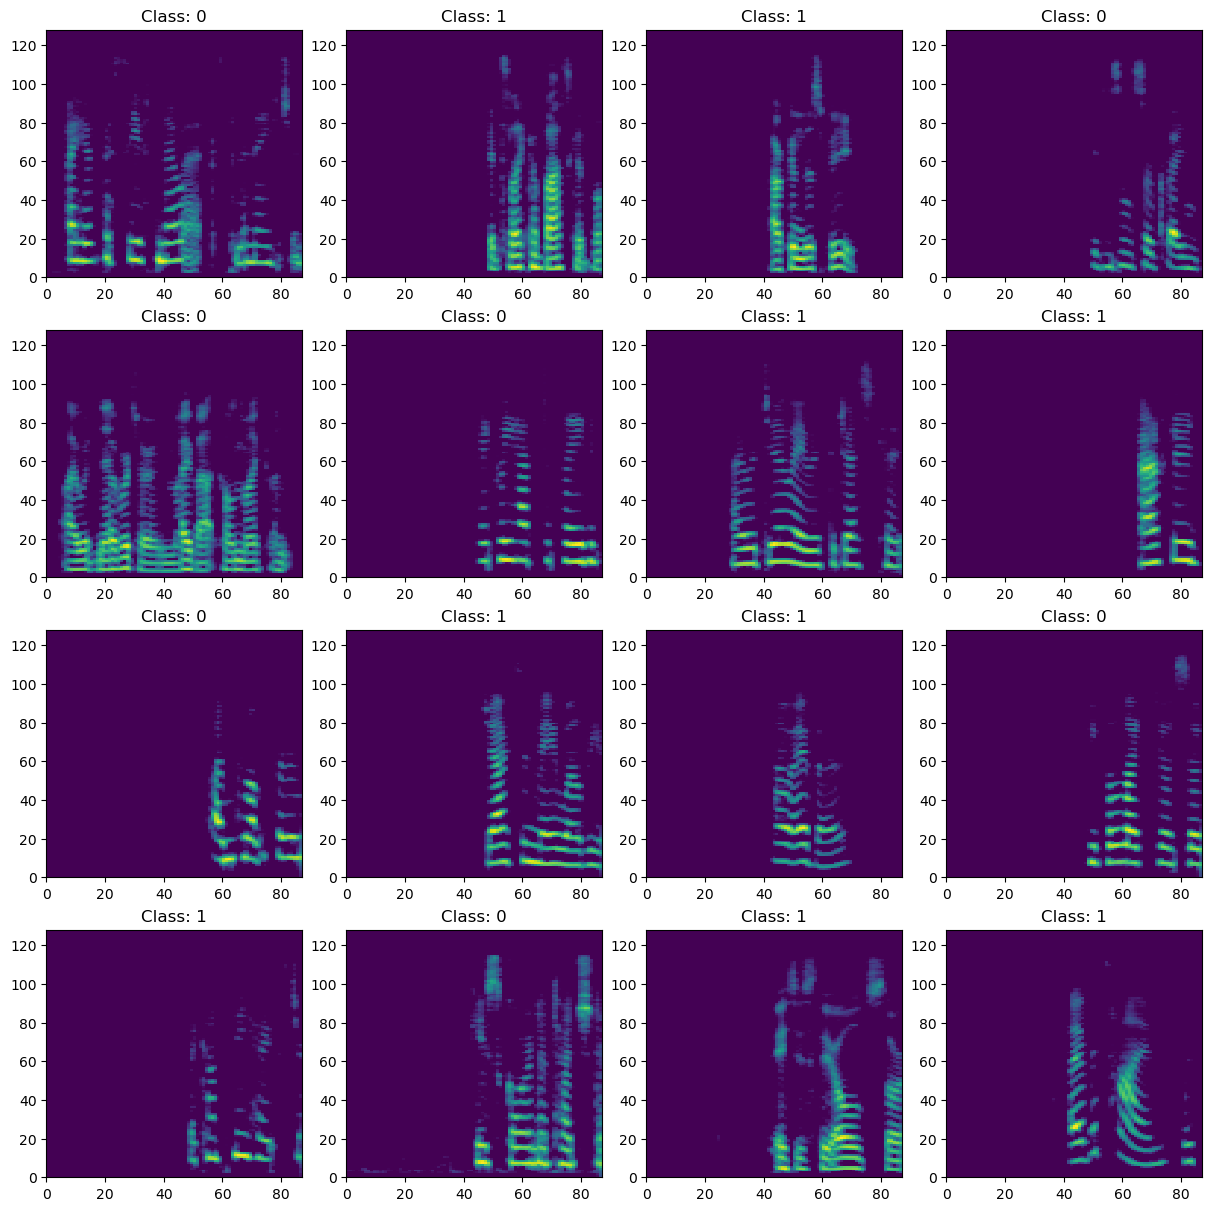

In [30]:
# Now let's plot the some of the first real and fake data
fig, axs = plt.subplots(4,4, constrained_layout=True, figsize = (12,12))
for i in range(4):
    for j in range(4):
        num = i*4+j
        img = X_train[num,:,:, 0]
        axs[i,j].pcolormesh(img)
        axs[i,j].set_title(f"Class: {Y_train.iloc[num]}")
plt.show()

The data has been loaded into the X_train and X_cv arrays. Now let's do the modeling of the data.

### Modeling the data
For modeling the data, we will try to use different variants of the convolutional neural network (CNN), First we will start with a simpler CNN model and see how the network trains the data.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input

input_shape = X_train.shape[1:]
# Let's build a CNN model of this form
# Input >> ConV2D << Maxpool << Conv2D <<  Maxpool <<  ConV2D << Maxpool << Conv2D << Maxpool << Flatten << Dense << Dense << Dense (sigmoid)
simple_cnn = Sequential([
    Input(shape=input_shape),
    Conv2D(filters=32, kernel_size=3, strides=(1,1), activation='relu', padding='valid', name = 'conv1'), 
    MaxPool2D(pool_size=(4, 4), strides=(2,2), name = 'pool1'),
    Conv2D(filters=64, kernel_size=3, strides=(1,1), activation='relu', padding='valid', name = 'conv2'), 
    MaxPool2D(pool_size=(3, 3), strides=(2,3), name = 'pool2'),
    Conv2D(filters=128, kernel_size=5, strides=(1,1), activation='relu', padding='valid', name = 'conv3'),
    MaxPool2D(pool_size=(2, 2), strides=(2,2), name = 'pool3'),
    Conv2D(filters=256, kernel_size=3, strides=(1,1), activation='relu', padding='valid', name = 'conv4'),          
    MaxPool2D(pool_size=(2, 2), strides=(2,2), name = 'pool4'),
    Flatten(name = 'Flat'),
    Dense(128, activation='relu', name='Dense1'),
    Dense(16, activation='relu', name='Dense2'),
    Dense(1, activation='sigmoid', name='output' )])

simple_cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
simple_cnn.summary()

2024-07-18 09:20:35.606630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 126, 85, 32)       320       
                                                                 
 pool1 (MaxPooling2D)        (None, 62, 41, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 60, 39, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 29, 13, 64)        0         
                                                                 
 conv3 (Conv2D)              (None, 25, 9, 128)        204928    
                                                                 
 pool3 (MaxPooling2D)        (None, 12, 4, 128)        0         
                                                                 
 conv4 (Conv2D)              (None, 10, 2, 256)        2

2024-07-18 09:20:37.966836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
#Let's train the model now
history = simple_cnn.fit(X_train, Y_train, epochs=25, batch_size=64, validation_data=(X_cv, Y_cv))

Epoch 1/25
59/59 [==============================] - 14s 229ms/step - loss: 0.5457 - accuracy: 0.7176 - val_loss: 0.5210 - val_accuracy: 0.7241
Epoch 2/25
59/59 [==============================] - 13s 219ms/step - loss: 0.4939 - accuracy: 0.7489 - val_loss: 0.4687 - val_accuracy: 0.7519
Epoch 3/25
59/59 [==============================] - 13s 220ms/step - loss: 0.4334 - accuracy: 0.7963 - val_loss: 0.4382 - val_accuracy: 0.7957
Epoch 4/25
59/59 [==============================] - 13s 222ms/step - loss: 0.3718 - accuracy: 0.8283 - val_loss: 0.3978 - val_accuracy: 0.8235
Epoch 5/25
59/59 [==============================] - 13s 225ms/step - loss: 0.3147 - accuracy: 0.8615 - val_loss: 0.3048 - val_accuracy: 0.8695
Epoch 6/25
59/59 [==============================] - 13s 221ms/step - loss: 0.2249 - accuracy: 0.9051 - val_loss: 0.2944 - val_accuracy: 0.8759
Epoch 7/25
59/59 [==============================] - 13s 220ms/step - loss: 0.2186 - accuracy: 0.9080 - val_loss: 0.2354 - val_accuracy: 0.9070

That's pretty good. The history dictionary has the loss and accuray of the model on the training and validation data. Let's convert these dictionaries into a pandas data frame and plot them up.

/var/folders/c8/g5hp4hlx7dv6gv7n9zdg74rc0000gn/T/ipykernel_48808/3697081374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/var/folders/c8/g5hp4hlx7dv6gv7n9zdg74rc0000gn/T/ipykernel_48808/3697081374.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

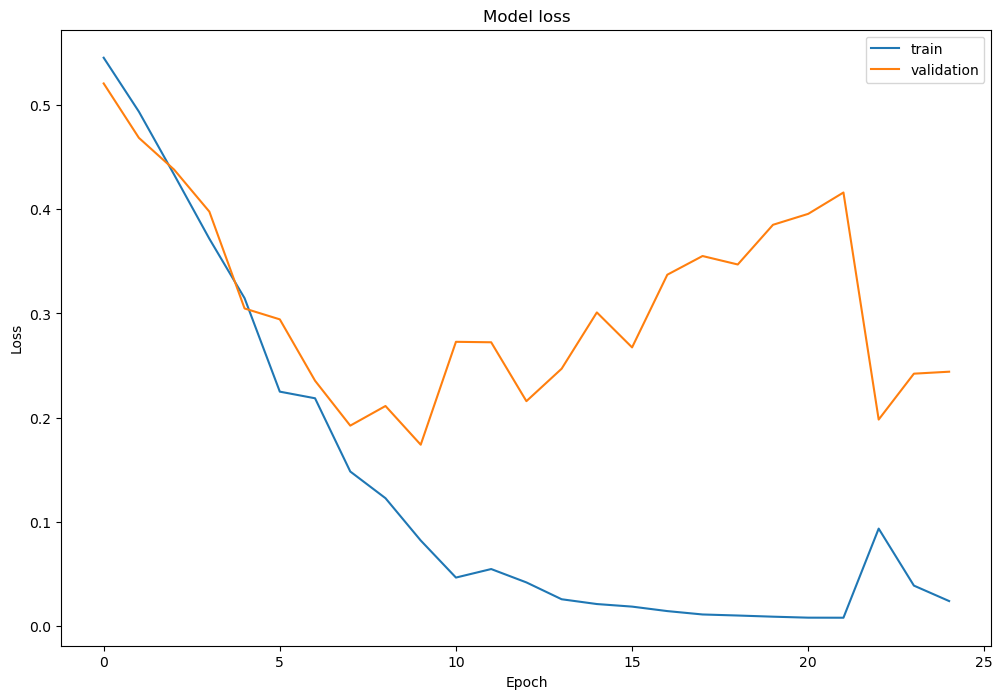

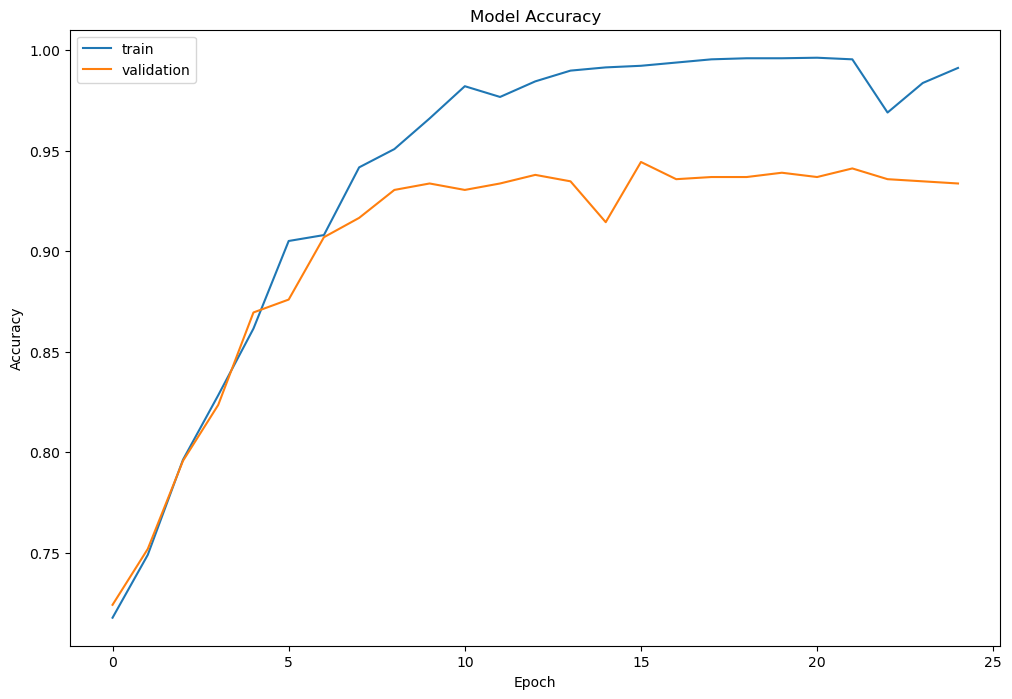

In [33]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)

# losses data frame
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)

# accuracy data frame
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)

# plotting the loss and accuracy
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# For prediction of a single sample
#ycv = simple_cnn.predict(np.expand_dims(X_cv[100,:,:,:],0))
#print(ycv)

ypred_train = simple_cnn.predict(X_train)
ypred_train[ypred_train>0.5] = 1
ypred_train[ypred_train<0.5] = 0

ypred_cv = simple_cnn.predict(X_cv)
ypred_cv[ypred_cv>0.5] = 1
ypred_cv[ypred_cv<0.5] = 0

print("Training data:")
print(f" Precision : {precision_score(Y_train, ypred_train)}, Recall: {recall_score(Y_train, ypred_train)},F1-score:{f1_score(Y_train, ypred_train)}")

print("CV data:")
print(f" Precision : {precision_score(Y_cv, ypred_cv)}, Recall: {recall_score(Y_cv, ypred_cv)}, F1-score:{f1_score(Y_cv, ypred_cv)}")



30/30 [==============================] - 1s 34ms/step
Training data:
 Precision : 0.99347061778001, Recall: 0.9979818365287588,F1-score:0.9957211175434181
CV data:
 Precision : 0.9330628803245437, Recall: 0.9406952965235174, F1-score:0.9368635437881874


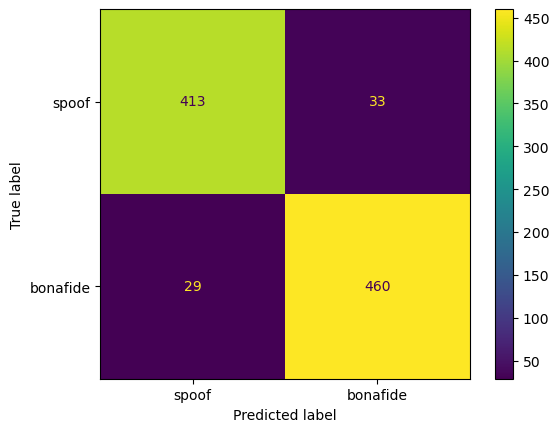

In [42]:
ConfusionMatrixDisplay.from_predictions(Y_cv, ypred_cv, display_labels = ['spoof','bonafide'])
plt.show()

In [ ]:
# Let's save the model to an h5 format
simple_cnn.save("simple-cnn-ssv.h5")

In [ ]:
# Couple of things to do
# Take 6 seconds of data which makes more sense
# find the performance of the data on some evaluation data
# deploy the model on Heroku